In [1]:
import pygmt
import os
import pandas as pd
import numpy as np
import math

In [2]:
def read_dtcc(ccfile):
    # 读取hypoDD dt.cc文件
    cc_list = []
    with open(ccfile,'r') as fp:
        for line in fp:
            tmp = line.split()
            if tmp[0] == "#":
                evtid1,evtid2 = tmp[1],tmp[2]
            else:
                station,dt,cc,pha = tmp
                cc_list.append([evtid1,evtid2,station,float(dt),float(cc),pha])
    cc_list = pd.DataFrame(data=cc_list,columns=['evtid1','evtid2','station','dt','cc','phase'])
    return cc_list

In [3]:
bsfile = 'TGR_data/tomoDD09/ph2dt/new15_bs.cc'
ccfile = 'TGR_data/tomoDD09/ph2dt/new15_cc.cc'
bs = read_dtcc(bsfile)
cc = read_dtcc(ccfile)

In [4]:
bs_p = bs[bs.phase=='P']
bs_p_7 = bs_p[bs_p.cc >= 0.7]
bs_s = bs[bs.phase=='S']
bs_s_7 = bs_s[bs_s.cc >= 0.7]
    
cc_p = cc[cc.phase=='P']
cc_s = cc[cc.phase=='S']

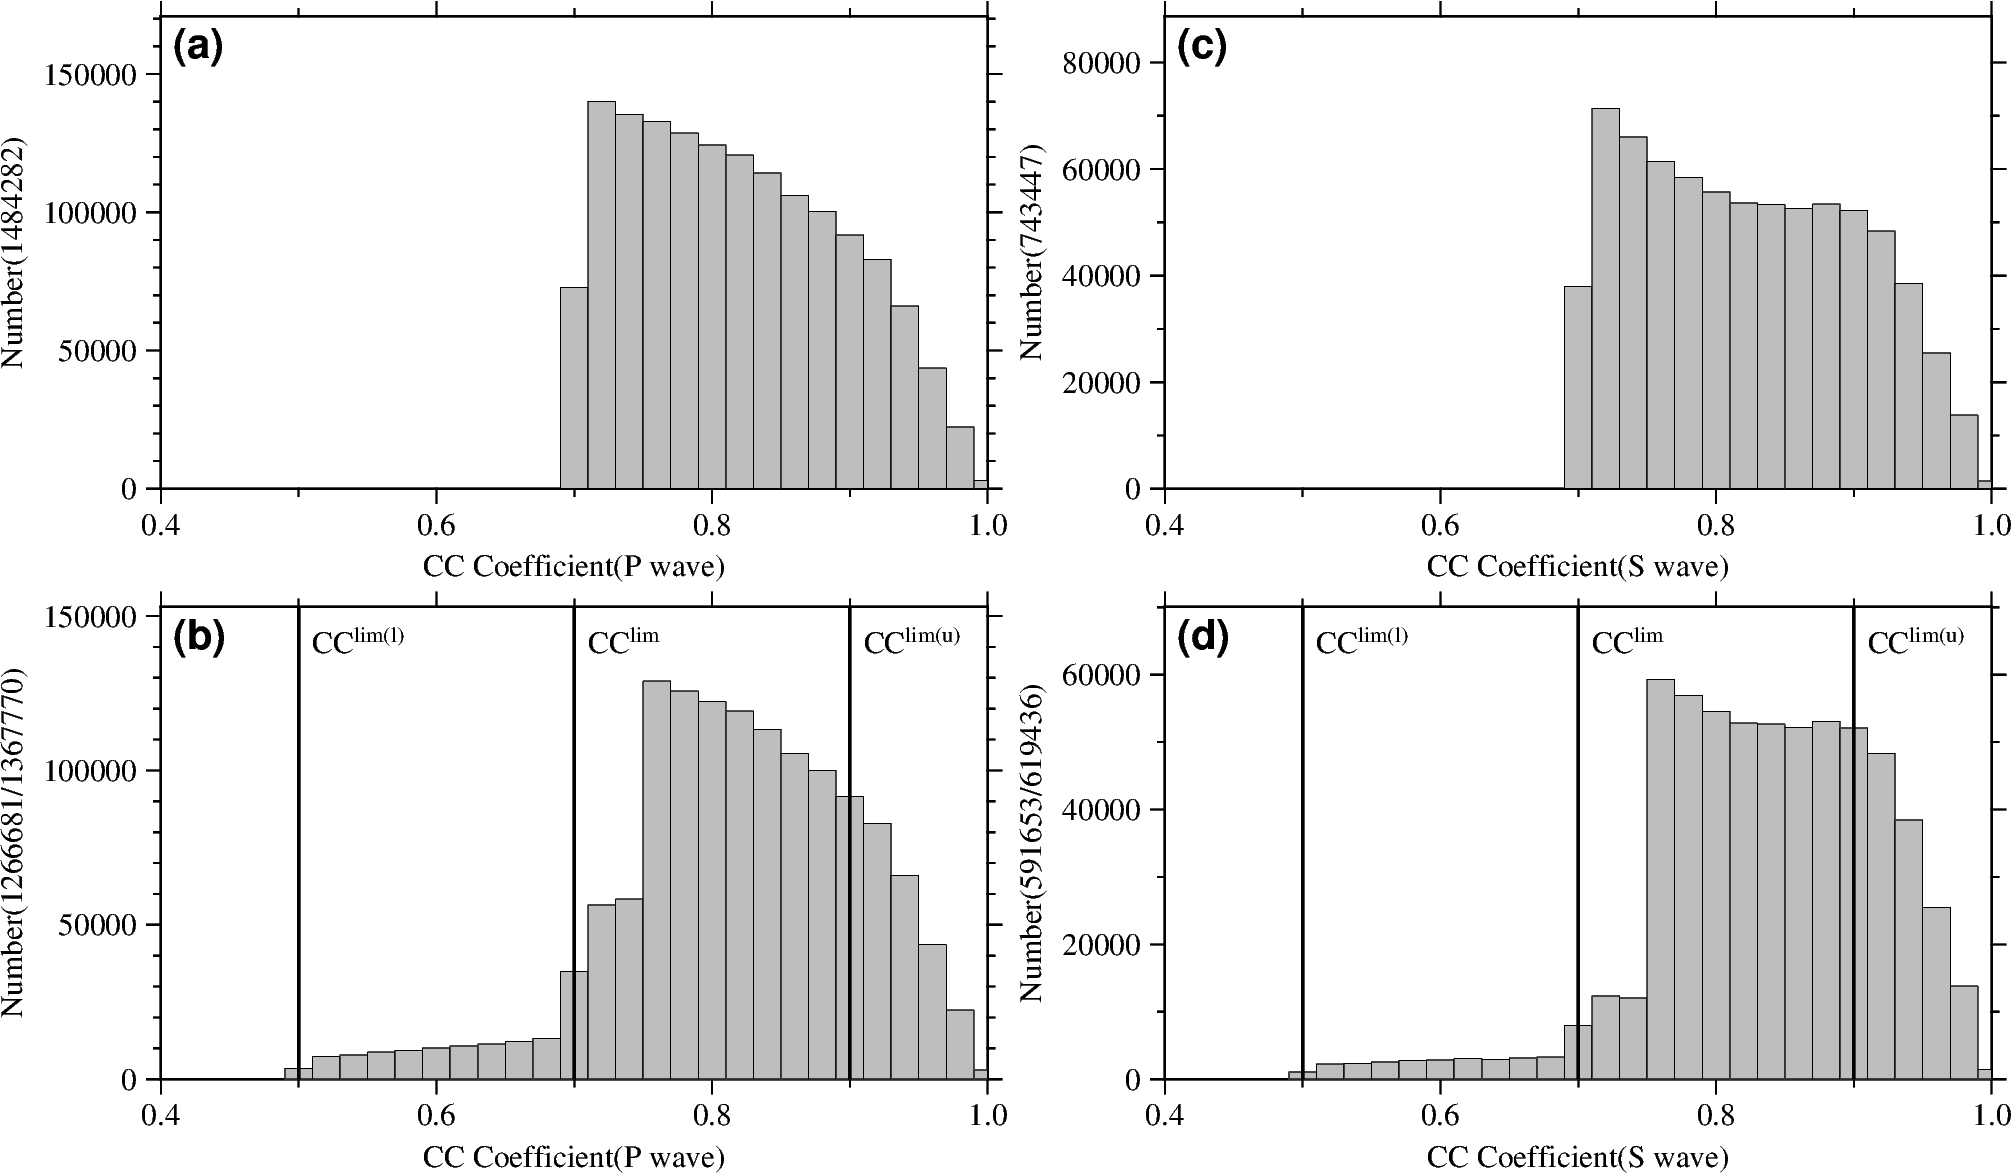

In [5]:
series = 0.02 # 统计间隔
bi = np.arange(0,1+series/2,series)
hist,bins = np.histogram(cc_p.cc,bins=bi)
fig = pygmt.Figure()
pygmt.config(FONT='7.5p,4',MAP_FRAME_PEN='0.5p')
ylabel="Number(%s)"%(len(cc_p))
frame = ['xaf+l"CC Coefficient(P wave)"','yaf+l"{}"'.format(ylabel),'WSen']
maxy = (math.ceil(max(hist)/100))*100 + max(hist)*0.2
region = [0.4,1,0,maxy]
fig.basemap(region=region,projection='X7c/4c',frame=frame)
fig.histogram(data=cc_p.cc, series=series,histtype=0,pen='0.02p',fill='gray',center=True)
fig.text(position='cTL',text='(a)',font='10p,1',offset='j0.1c/0.1c',fill='white')

fig.shift_origin(xshift='8.5c')
hist,bins = np.histogram(cc_s.cc,bins=bi)
ylabel="Number(%s)"%(len(cc_s))
frame = ['xaf+l"CC Coefficient(S wave)"','yaf+l"{}"'.format(ylabel),'WSen']
maxy = (math.ceil(max(hist)/100))*100 + max(hist)*0.2
region = [0.4,1,0,maxy]
fig.basemap(region=region,projection='X7c/4c',frame=frame)
fig.histogram(data=cc_s.cc, series=series,histtype=0,pen='0.02p',fill='gray',center=True)
fig.text(position='cTL',text='(c)',font='10p,1',offset='j0.1c/0.1c',fill='white')

fig.shift_origin(xshift='-8.5c',yshift='-5c')
hist,bins = np.histogram(bs_p.cc,bins=bi)
ylabel="Number(%s/%s)"%(len(bs_p_7),len(bs_p))
frame = ['xaf+l"CC Coefficient(P wave)"','yaf+l"{}"'.format(ylabel),'WSen']
maxy = (math.ceil(max(hist)/100))*100 + max(hist)*0.2
region = [0.4,1,0,maxy]
fig.basemap(region=region,projection='X7c/4c',frame=frame)
fig.histogram(data=bs_p.cc, series=series,histtype=0,pen='0.02p',fill='gray',center=True)
fig.text(position='cTL',text='(b)',font='10p,1',offset='j0.1c/0.1c',fill='white')
fig.plot(x=[0.5,0.5],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.51,y=maxy*0.93,text='CC@+lim(l)@+',justify='ML')
fig.plot(x=[0.7,0.7],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.71,y=maxy*0.93,text='CC@+lim@+',justify='ML')
fig.plot(x=[0.9,0.9],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.91,y=maxy*0.93,text='CC@+lim(u)@+',justify='ML')

fig.shift_origin(xshift='8.5c')
hist,bins = np.histogram(bs_s.cc,bins=bi)
ylabel="Number(%s/%s)"%(len(bs_s_7),len(bs_s))
frame = ['xaf+l"CC Coefficient(S wave)"','yaf+l"{}"'.format(ylabel),'WSen']
maxy = (math.ceil(max(hist)/100))*100 + max(hist)*0.2
region = [0.4,1,0,maxy]
fig.basemap(region=region,projection='X7c/4c',frame=frame)
fig.histogram(data=bs_s.cc, series=series,histtype=0,pen='0.02p',fill='gray',center=True)
fig.text(position='cTL',text='(d)',font='10p,1',offset='j0.1c/0.1c',fill='white')

fig.plot(x=[0.5,0.5],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.51,y=maxy*0.93,text='CC@+lim(l)@+',justify='ML')
fig.plot(x=[0.7,0.7],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.71,y=maxy*0.93,text='CC@+lim@+',justify='ML')
fig.plot(x=[0.9,0.9],y=[0,maxy],pen='0.75p',fill='gray')
fig.text(x=0.91,y=maxy*0.93,text='CC@+lim(u)@+',justify='ML')
fig.show()

In [6]:
fig.savefig('plotting_figures/Figure4_new15_bs.png',dpi=300)
fig.savefig('plotting_figures/Figure4_new15_bs.pdf')